# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): Gradient boosting
### <center>Predict whether income exceeds $50K/yr based on census data.

Link: https://www.kaggle.com/mattmet/income-prediction-xgboost-accuracy-86-02

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model  import LogisticRegression
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier, plot_tree

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import accuracy_score, balanced_accuracy_score

# Leer CSV

In [3]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

--2020-02-04 15:55:37--  https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3818789 (3.6M) [text/plain]
Saving to: ‘./../data/adult.csv.1’

adult.csv.1         100%[===================>]   3.64M  --.-KB/s    in 0.04s   

2020-02-04 15:55:37 (88.8 MB/s) - ‘./../data/adult.csv.1’ saved [3818789/3818789]



In [0]:
df = pd.read_csv("../data/adult.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


# Qué queremos predecir? -> `df.Salary`

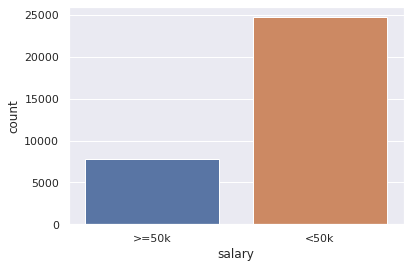

In [7]:
sns.countplot(df.salary);

# Variables

In [8]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'salary']

Date/time features:
 []


# Missings

In [9]:
df.shape

(32561, 15)

In [10]:
df = df.dropna(axis='rows')
df.shape

(31812, 15)

# Categorical

In [11]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,44,4,236746,12,14.0,0,4,1,4,1,10520,0,45,39,1
3,38,5,112847,14,15.0,2,10,0,1,1,0,0,40,39,1
5,20,4,63210,11,9.0,4,6,3,4,1,0,0,15,39,0
8,46,4,328216,11,9.0,2,3,0,4,1,0,0,40,39,1
21,26,4,746432,11,9.0,4,6,3,2,1,0,0,48,39,0


# Models

In [0]:
x = df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
       ]]
y = df["salary"]

In [19]:
models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Extra Trees',         ExtraTreesClassifier(n_jobs=-1)),   # parecido a random forest
    ('Random Forest',       RandomForestClassifier(n_jobs=-1)),
    ('Gradient Boosting',   GradientBoostingClassifier()),
    ('XGBoost',             XGBClassifier(n_estimators=100)),
    ('XGBoost 250',         XGBClassifier(n_estimators=250))
]

outcome = []
Modelnames = []

for name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) # validación cruzada estratificada en 5 grupos.
    cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy') #
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

Logistic Regression: 78.99% (0.63%)
Decision Tree: 81.38% (0.47%)
Extra Trees: 84.60% (0.39%)
Random Forest: 85.70% (0.34%)
Gradient Boosting: 86.56% (0.35%)
XGBoost: 86.49% (0.43%)
XGBoost 250: 87.03% (0.41%)


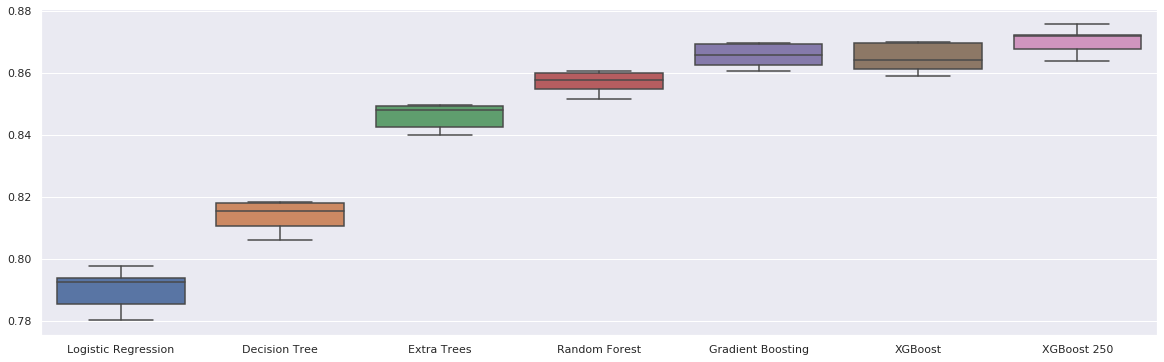

In [20]:
results ={'Names': Modelnames,'Results': outcome}
plt.figure(figsize=(20,6))
sns.boxplot(x='Names',y='Results',data=results)